# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


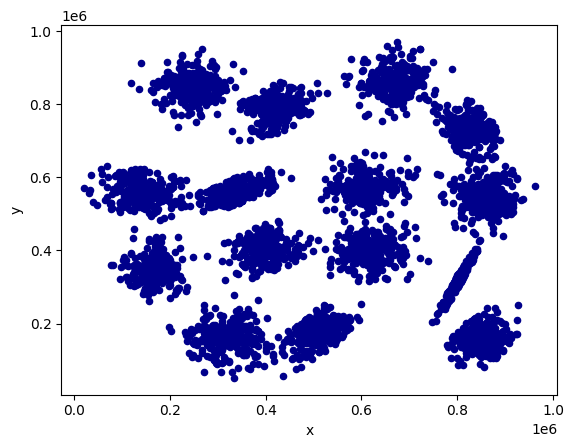

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

In [ ]:
#from sklearn.preprocessing import StandardScaler

# Pemrosesan data: Penskalaan fitur
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
from warnings import filterwarnings as fw; fw("ignore")

#Lakukan Proses Pencarian CLuster terbaik untuk data diatas
from sklearn.cluster import KMeans
#START CODE
inertia = []
for k in range(5, 39):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)
inertia
#END CODE

[104935513328366.25,
 82172479166907.17,
 63577135519178.58,
 48146924629521.43,
 40427232568036.41,
 34391481278674.81,
 28911073060127.125,
 23146756787307.777,
 18350029727191.914,
 13486733767168.459,
 8917615616867.258,
 8654195380138.777,
 8415631292726.098,
 8227282809930.557,
 8000004005435.432,
 7782061513020.172,
 7672183139126.995,
 7519773294441.791,
 7189455085478.642,
 7006296067332.918,
 6950032397189.744,
 6720946199046.6875,
 6577198007791.038,
 6390682755867.611,
 6246340608018.453,
 6090025073606.241,
 5922881030011.788,
 5831066030901.893,
 5734161938700.555,
 5493846264104.768,
 5378435273441.025,
 5246916788781.409,
 5228801181267.248,
 5045856386247.537]

In [ ]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(5, 39)])
inertia_df

,Inertia
5,1.049355e+14
6,8.217248e+13
7,6.357714e+13
8,4.814692e+13
9,4.042723e+13
10,3.439148e+13
11,2.891107e+13
12,2.314676e+13
13,1.835003e+13
14,1.348673e+13


Text(0.5, 1.0, 'Elbow Method')

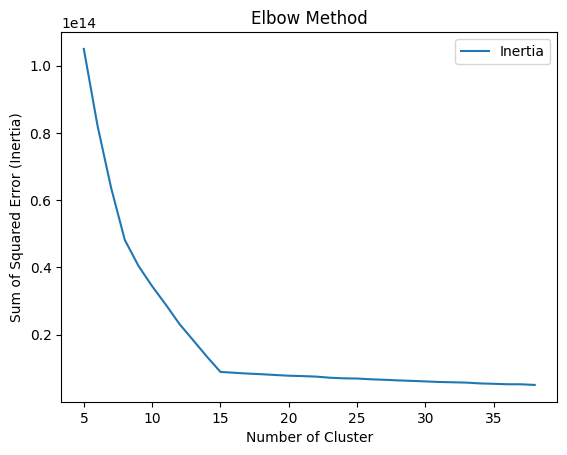

In [ ]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [ ]:
# Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
# Contoh pemanggilan Library Clustering

# START CODE
 # Jumlah cluster yang Anda pilih
kmeans = cluster.KMeans(n_clusters=15, random_state=0)
kmeans.fit(data)
label = kmeans.fit_predict(data)
# END CODE

# Hitung skor siluet
score = silhouette_score(data, label)
print("Silhouette score =", score)

Silhouette score = 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = label
result.head()
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


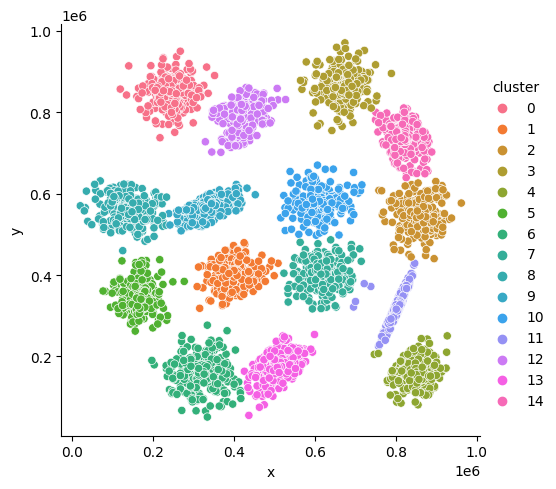

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#START CODE
# Buat palet kustom dengan 15 warna yang berbeda
custom_palette = sns.color_palette("husl", 15)

# Plot data dengan palet kustom
sns.relplot(x='x', y='y', hue='cluster', data=result, palette=custom_palette)


#END CODE
# Tampilkan plot
plt.show()